# Data Cleaning - Bureau

# 1. Import Library dan Dataset

In [1]:
# Import library dasar untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Memastikan Jupyter Notebook menampilkan semua kolom
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
bureau = pd.read_csv('bureau.csv')

In [3]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


# 2. Exploratory Data Analysis

## 2.1 Info dan Statistik Dasar dari DataFrame

In [4]:
#Menampilkan ringkasan statistik dari kolom numerik:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [5]:
#Menampilkan ringkasan statistik dari kolom kategorikal:
bureau.describe(include=['object'])

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


## 2.2 Checking Duplicate Values

In [21]:
bureau.duplicated().sum()

0

Tidak terdapat duplicate value pada dataset "bureau"

## 2.3 Checking Missing Values

In [6]:
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [7]:
# Menghitung jumlah nilai hilang di setiap kolom
missing_values = bureau.isnull().sum()

# Menghitung persentase nilai hilang di setiap kolom
missing_percentage = (missing_values / len(bureau)) * 100

# Membuat DataFrame untuk menampilkan kolom dengan nilai hilang dan persentasenya
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Menampilkan kolom yang memiliki nilai hilang (nilai hilang > 0)
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_data

,Missing Values,Percentage
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757


In [8]:
# Tentukan threshold persentase nilai hilang
threshold = 0.2

# Hitung persentase nilai hilang di setiap kolom
missing_percent = bureau.isnull().mean()

# Pilih kolom yang persentase nilai hilangnya di atas threshold
columns_to_drop = missing_percentage[missing_percent > threshold].index

# Drop kolom-kolom tersebut dari DataFrame
bureau_clean = bureau.drop(columns=columns_to_drop)
bureau_clean

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,0,91323.00,0.0,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,0,225000.00,171342.0,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,0,464323.50,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.00,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,0,2700000.00,NaN,0.0,Consumer credit,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,0,11250.00,11250.0,0.0,Microloan,-19
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,0,38130.84,0.0,0.0,Consumer credit,-2493
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,0,15570.00,NaN,0.0,Consumer credit,-967
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,0,36000.00,0.0,0.0,Consumer credit,-1508


In [9]:
#Menyeleksi baris dalam DF 'bureu_cleaned', dimana nilai kolom  'AMT_CREDIT_SUM_DEBT' adalah NaN (tidak ada).
bureau_clean.loc[bureau_clean.AMT_CREDIT_SUM_DEBT.isna()]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
2,215354,5714464,Active,currency 1,-203,0,528.0,0,464323.5,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.0,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,0,2700000.0,NaN,0.0,Consumer credit,-21
12,162297,5714474,Active,currency 1,-277,0,5261.0,0,7033500.0,NaN,0.0,Mortgage,-31
15,238881,5714484,Closed,currency 1,-2911,0,-2607.0,0,48555.0,NaN,0.0,Consumer credit,-2601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716391,129669,5057475,Closed,currency 1,-918,0,-736.0,0,90000.0,NaN,0.0,Consumer credit,-708
1716396,181001,5057529,Closed,currency 1,-339,0,NaN,0,1057500.0,NaN,0.0,Consumer credit,-163
1716407,146896,5057629,Closed,currency 1,-1990,0,-1244.0,0,90000.0,NaN,0.0,Consumer credit,-1248
1716415,317217,5057684,Closed,currency 1,-1970,0,-1577.0,0,93955.5,NaN,0.0,Consumer credit,-1577


Terdapat 257,669 entri dalam DataFrame bureau_cleaned dimana nilai dalam kolom AMT_CREDIT_SUM_DEBT adalah kosong atau tidak tersedia.

In [10]:
# Select numerical columns except specified ones
numerical_columns = bureau_clean.select_dtypes(include='number').drop(['SK_ID_CURR', 'SK_ID_BUREAU', 'CNT_CREDIT_PROLONG'], axis=1)

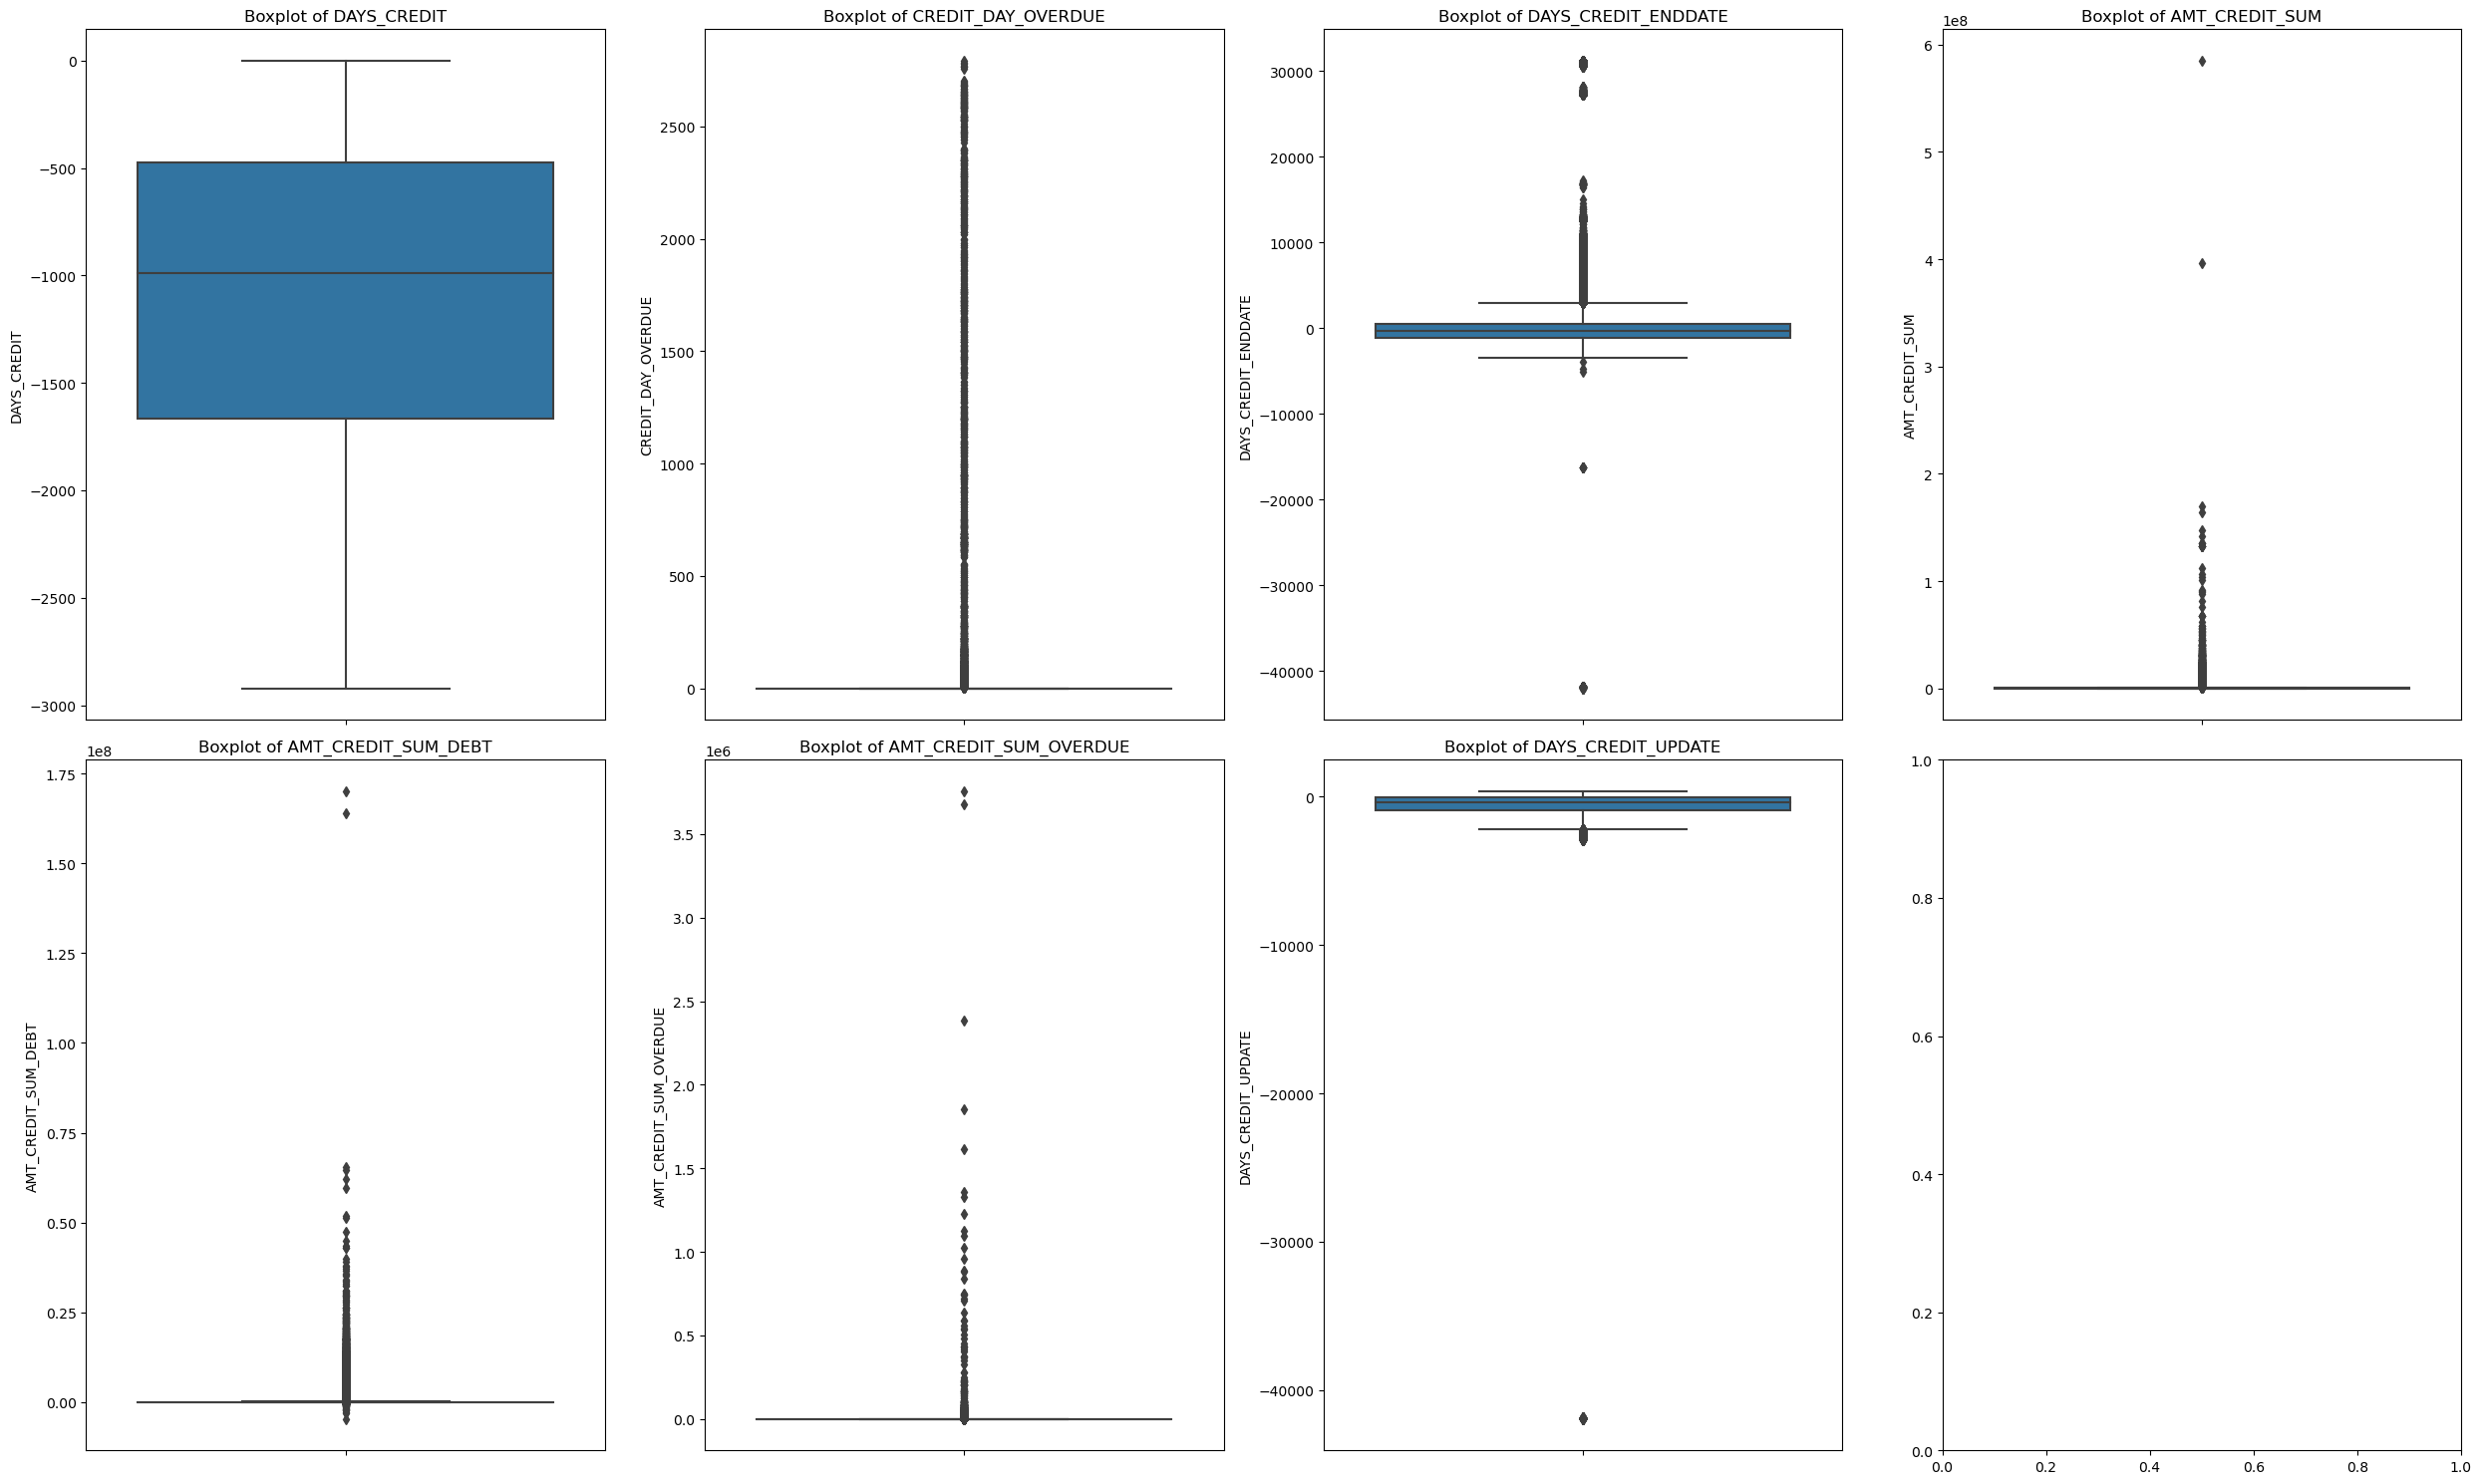

In [11]:
# Create boxplot for every numerical column
fig, ax = plt.subplots(2, 4, figsize=(25, 15))  
ax = ax.flatten() 
for i, col in enumerate(numerical_columns.columns): 
    sns.boxplot(y=numerical_columns[col], ax=ax[i])  
    ax[i].set_title(f'Boxplot of {col}') 
plt.tight_layout()  

Terdapat beberapa fitur (features) dalam dataset 'bureau' yang mengandung outlier

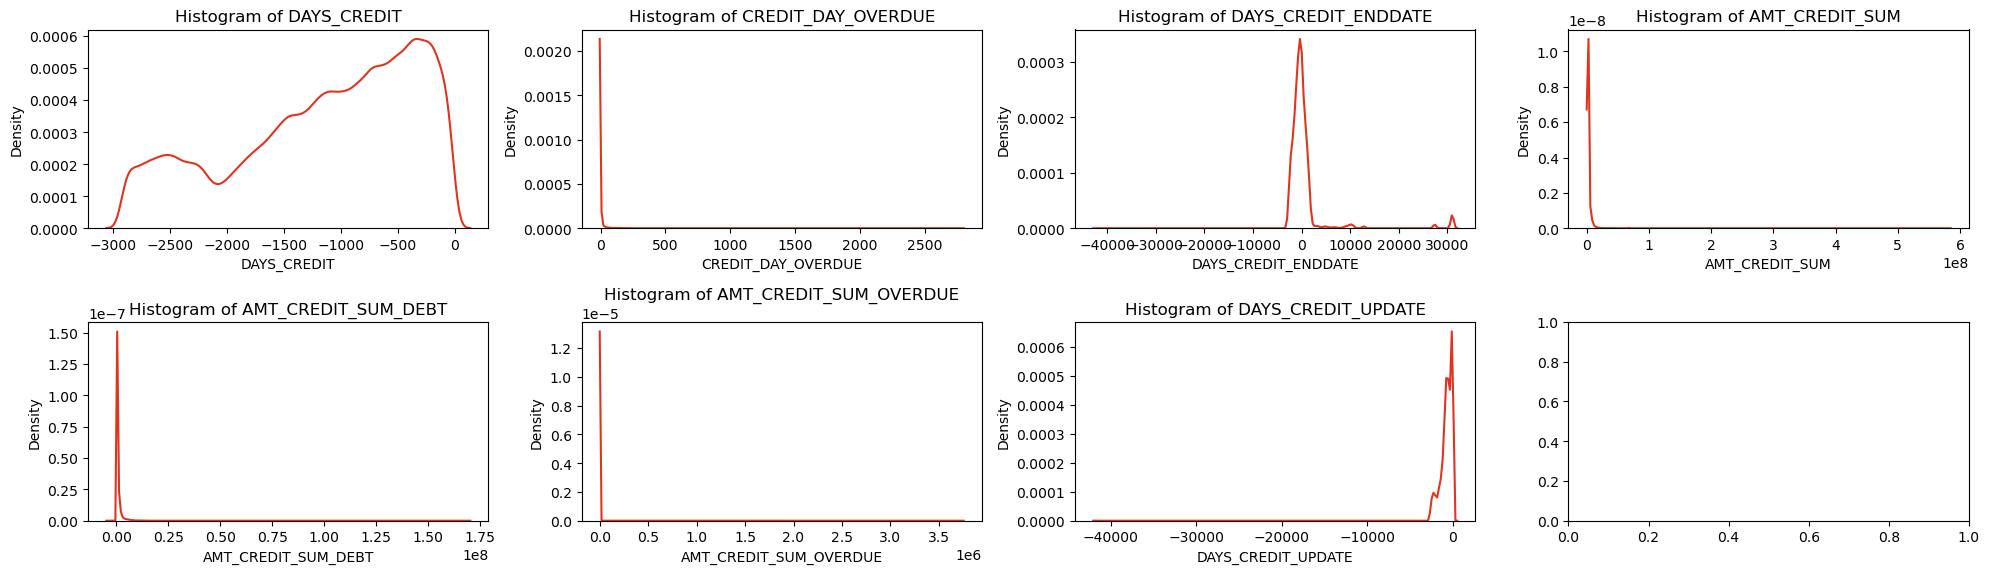

In [15]:
fig, ax = plt.subplots(2, 4, figsize=(20, 6))
ax = ax.flatten()
for i, col in enumerate(numerical_columns.columns):
    sns.kdeplot(numerical_columns[col], ax=ax[i], color='#E1341E')
    ax[i].set_title(f'Histogram of {col}')

plt.tight_layout()

In [20]:
bureau_cleaned = bureau_clean.fillna(0)
bureau_cleaned = bureau_clean.fillna(0)
csv_file_path = 'C:/Users/Inne Andarini/Downloads/bureau_cleaned.csv'
bureau_cleaned.to_csv(csv_file_path, index=False)
